## Install these packages before running this code

In [32]:
#pip install pytesseract

In [33]:
#pip install opencv-python

In [34]:
# pip install vaderSentiment

In [35]:
# pip install gTTs

In [36]:
# pip install transformers

## Import these packages

In [1]:
import os
from gtts import gTTS
import time
from transformers import pipeline,Conversation

In [2]:
import numpy as np
import datetime

## ChatBot Intervention System

In [39]:
class ChatBot():
    def __init__(self, name):
        print("----- Starting up", name, "-----")
        self.name = name
    def chat(self):
        self.text = input()
        print("Me  --> ", self.text)
            
    @staticmethod
    # This function helps the chatbot to speak with the user, and user can use the chat function to communicate.
    def text_to_speech(text):
        print("Robert --> ", text)
        speaker = gTTS(text=text, lang="en", slow=False)
        speaker.save("res.mp3")
        statbuf = os.stat("res.mp3")
        mbytes = statbuf.st_size / 1024
        duration = mbytes / 200
        os.system('start res.mp3')  #if you are using mac->afplay or else for windows->start
        # os.system("close res.mp3")
        time.sleep(int(50*duration))
        os.remove("res.mp3")
    

In [40]:
# reply.txt contains some replys for the chatbot for the user which is stored inside context.
with open('reply.txt') as f:
    contents = f.read()

In [41]:
contents = contents.replace("\n"," ")
context = contents.replace("A: ","")
# context

"I'm here for you. Remember, you're not alone in this. What are some things that usually bring you joy or help you relax? Take it one step at a time and focus on self-care. What activities help you relax? Recognize your unique strengths and surround yourself with positive influences. Take time to reflect on your skills and explore new opportunities. You have the strength to overcome this setback. Seek support from loved ones or professionals and engage in activities that used to bring you joy. Healing takes time, but it's possible. Understand that mistakes are part of being human. Learn from them, focus on personal growth, and practice self-compassion. Reach out to someone you trust and seek their support. Remember that your life has value and purpose, even if it's not clear now. Brighter days are ahead. It's tough to battle with self-esteem, but remember that you have unique strengths and qualities. Focus on the things you appreciate about yourself, and try engaging in activities that

In [42]:
# contents cantain these answers in the form of lists
contents = contents.split('A:')
# contents

['',
 " I'm here for you. Remember, you're not alone in this. What are some things that usually bring you joy or help you relax? ",
 ' Take it one step at a time and focus on self-care. What activities help you relax? ',
 ' Recognize your unique strengths and surround yourself with positive influences. ',
 ' Take time to reflect on your skills and explore new opportunities. You have the strength to overcome this setback. ',
 " Seek support from loved ones or professionals and engage in activities that used to bring you joy. Healing takes time, but it's possible. ",
 ' Understand that mistakes are part of being human. Learn from them, focus on personal growth, and practice self-compassion. ',
 " Reach out to someone you trust and seek their support. Remember that your life has value and purpose, even if it's not clear now. Brighter days are ahead. ",
 " It's tough to battle with self-esteem, but remember that you have unique strengths and qualities. Focus on the things you appreciate ab

In [ ]:
# Running the AI
def start_robert():
    ai = ChatBot(name="Robert")
    nlp = pipeline("conversational", model="microsoft/DialoGPT-medium")
    qa_model = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")
    os.environ["TOKENIZERS_PARALLELISM"] = "true"
    ex=True
    ai.text_to_speech("Hello I am Robert the AI, what can I do for you?")
    while ex:
        ai.chat()

        # if user compliments the Bot
        if any(i in ai.text for i in ["thank","thanks"]):
            res = np.random.choice(["you're welcome!","anytime!","no problem!","cool!","I'm here if you need me!","mention not"])
        
        # if user wishes to exit the chatbot
        elif any(i in ai.text for i in ["exit","close"]):
            res = np.random.choice(["Tata","Have a good day","Bye","Goodbye","Hope to meet soon","peace out!"])
            ex=False
          
        ## conversation
        else:   
            # if user needs some professional help or family intervention
            if any(i in ai.text for i in ["talk with someone","I need help","phone number","mobile number","helpline"]):
                res = np.random.choice(["Let me help you, call '9876543210' and they will try to help you as much as possible",
                                        "Have a talk with your friend - 9753086421"])
            else:
                # 'tone' is used to find the emotion of the text sent by the user 
                # if it is -ve then we go to the question answering model
                # An answer is generated from the query and context which is given below,  
                # if there is any sentence in the contents list which contains this answer, we select that sentence as the reply
                tone = model.polarity_scores(ai.text)
                if tone['compound'] < 0:
                    reply = qa_model(question = str(ai.text) , context = context)
                    wrd = reply['answer'] 
                    for sentence in contents:
                        if wrd in sentence:
                            res = sentence
                            break
                # else we go to the nlp model for general chating
                else:
                    res = nlp(Conversation(ai.text), pad_token_id=50256)
                    res = str(res)
                    res = res[res.find("bot >> ")+6:].strip()
                        
        ai.text_to_speech(res)
    print("----- Closing down Robert -----")

In [44]:
from PIL import Image
import cv2
from pytesseract import pytesseract
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# this is the path of tesseract.exe file
pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [46]:
# this is a specific configeration of tesseract that we require
custom_config = r"--oem 3 --psm 11 -c tessedit_char_whitelist= 'ABCDEFGHIJKLMNOPQRSTUVWXYZ '"

In [47]:
# Assume that these are the posts collected from the user at a particular interval of time.
# And these are the paths for the posts. Change path for your system.

path = ['post.png' , 'post3.png' , 'post6.png' , 
        'post1_1.png' , 'post1_2.png' ,
        'post1_3.png' , 'post1_4.png' ,
        'post1_5.png' , 'post_1_6.png' ,
        'post_1_7.png']


In [48]:
# Here we use pytesseract to extract recognisable text from the image to categorize the context of the post.
im=np.array(Image.open(path[0]))
text2 = pytesseract.image_to_string(im, lang='eng', config=custom_config)
print("Text extracted from the post is :-   ")
print(text2.replace('\n', ' '))

Text extracted from the post is :-   
~  | 


In [49]:
# As we can see, there is no text extracted, so we need to do some pre-processing to obtain some usefull text.

In [50]:
# we will use a gray filter, then a bilateral filter and finally threshold the image with the below specifications.

def preprocess(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im= cv2.bilateralFilter(im,5,30,60)
    _, im = cv2.threshold(im,140, 240, 1)  # try either (im,140, 240, 1) or (im,160, 230, 1) if not working properly
    plt.figure(figsize=(4,4))
    plt.title('Post')
    plt.imshow(im, cmap='gray'); plt.xticks([]); plt.yticks([])
    return im

NEWS  i  |  KASHMIR NEWS  VILLE  Woman Dies Of Heart Attack After  Son Fails To Qualify Class 12 Exam  In Anantnag 


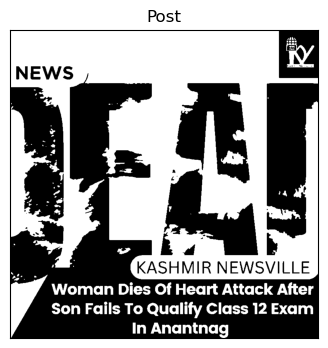

In [51]:
i=np.array(Image.open(path[0]))
im=preprocess(i)
text1 = pytesseract.image_to_string(im, lang='eng', config=custom_config)
print(text1.replace('\n', ' '))

In [52]:
# we can see that we were able to extract some useful text from the image

# Sentiment analysis of the obtained text from the social media posts

In [53]:
# next we will find the type of text context - (postive, negative, neutral)

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [55]:
model = SentimentIntensityAnalyzer()

In [56]:
# This function will take image as input and convert it into text and then use SentimentIntensityAnalyzer() model 
# to categorize the type of text extracted and then return the type as output.

def sentiment(im):
    text = pytesseract.image_to_string(im, lang='eng', config=custom_config)
    print(text.replace('\n', ' '))
    s = model.polarity_scores(text)
    if s['compound'] > 0:
        Type = 1     
    elif s['compound'] < 0:
        Type = -1
    elif s['compound'] == 0:
        Type = 0
        
    return Type

In [57]:
# This function takes the path of the posts as input, then uses the preprocess() and sentiment() function to get 
# the type of data and appends the type to a list and returns this list as a output.

def Sentiment_analysis(path):
    context = []
    for i in range(len(path)):
        im = np.array(Image.open(path[i]))
        im = preprocess(im)
        t = sentiment(im)
        context.append(t)

    return context

## Working of the System

NEWS  i  |  KASHMIR NEWS  VILLE  Woman Dies Of Heart Attack After  Son Fails To Qualify Class 12 Exam  In Anantnag 
a  ay  Pn  : Ili dw  = |  INSTEAG OF sue A  MAKE MONEY IN 2023 
India Win The 2023 Women's Hockey Junior  Asia Cup After Beating South Korea  By 2-1 In Japan !  Freep  Ne  fe  S4  Al  ra  t)  “y  if  4  Congratulations India = ° 
imagine  Death comes itself to  un ask ,to die  what will u  say 
Memories are very dangerous 
PSYCHOLOGY SAYS  MOST OF THE GENIUS PERSONS  Fa bP  &@;  co  ARE BORN IN JUNE, JULY, OCTOBER  AND NOVEMBER 
a  t  wy  &  Oe?  A child and his parents lived in a house away  from the city, one day the husband and wife  were fighting among themselves and the  husband in anger hit the wife with a hard  object.  Swipe please:-  ae  Y),  Sa  see  OSS  YY  a oe  i>  mH,  ae, |  wi  ,  .4  Vi  ").  \  v 
ak  ]-  ee  wd  TS  aa  ae: og  ~ppehens Fare 7  10 Dead*& Several OMeiginiured  www.mynewsne.com  10 Dead And Several Injured  After Wedding Bus Crashes  Fol

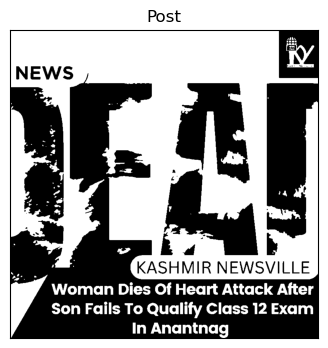

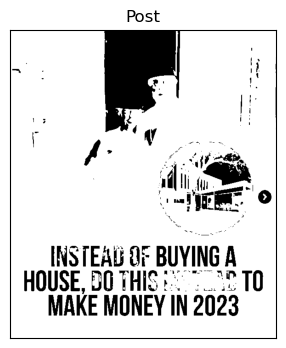

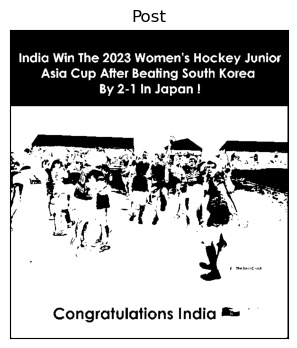

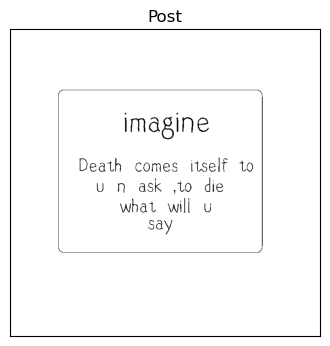

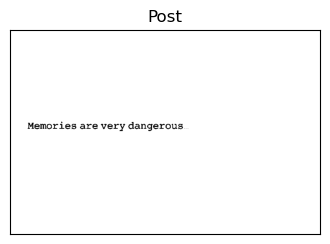

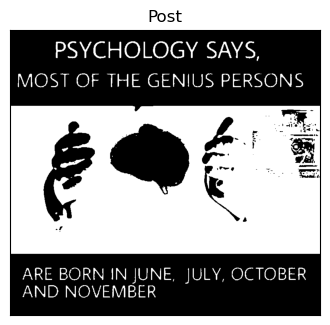

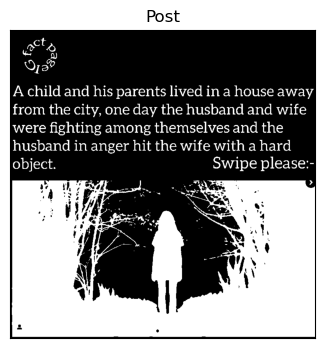

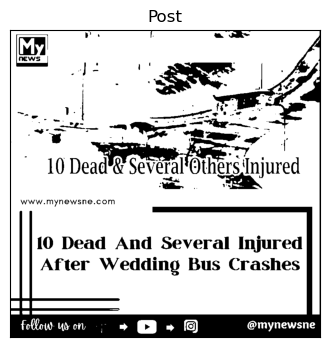

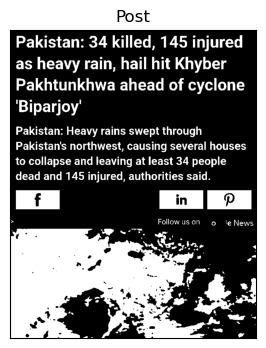

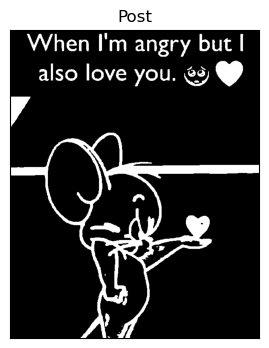

In [58]:
# Let us assume that, 'Path' contains all the social media posts viewed/liked by the user at particular time-interval.
activity = Sentiment_analysis(path)

In [59]:
# Here is the output of these functions
activity

[-1, 0, 1, -1, -1, 0, -1, -1, -1, 1]

In [62]:
# To find the trend, we can sum the list to find if there is a need for our Chatbot Intervention System, 
# if required then the system is activated...

if np.array(activity).sum() < -1 :
    print("ChatBot Intervention System Activates...")    
    start_robert()

ChatBot Intervention System Activates...
----- Starting up Robert -----


No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Robert -->  Hello I am Robert the AI, what can I do for you?
can u help me


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Me  -->  can u help me
Robert -->  yes message me
i feel depressed and i dont know what to do
Me  -->  i feel depressed and i dont know what to do
Robert -->   Take it one step at a time and focus on self-care. What activities help you relax? 
when i am depressed, i tend to sleep a lot
Me  -->  when i am depressed, i tend to sleep a lot
Robert -->   Take it one step at a time and focus on self-care. What activities help you relax? 
i sleep a lot


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Me  -->  i sleep a lot
Robert -->  I sleep a lot too.
i want to talk with someone
Me  -->  i want to talk with someone
Robert -->  Have a talk with your friend - 9753086421
thanks
Me  -->  thanks
Robert -->  cool!
exit
Me  -->  exit
Robert -->  Goodbye
----- Closing down Robert -----


In [ ]:
# As a whole code
activity = Sentiment_analysis(path)
if np.array(activity).sum() < -1 :
    print("ChatBot Intervention System Activates...")    
    start_robert()